In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Kenny Britt_Trans 1.csv"
csv_path2 = "../Player Tweets/Kenny Britt_Trans 2.csv"
csv_path3 = "../Player Tweets/Kenny Britt_Trans 3.csv"
#csv_path4 = "../Player Tweets/Kenny Britt_Trans 4.csv"

#Establish pd dataframe for each file
kennybritt1 = pd.read_csv(csv_path1, sep=";")
kennybritt2 = pd.read_csv(csv_path2, sep=";")
kennybritt3 = pd.read_csv(csv_path3, sep=";")
#kennybritt4 = pd.read_csv(csv_path4, sep=";", error_bad_lines=False)


#concatenate data frames *kennybritt4* not working
kennybritt_master = pd.concat([kennybritt1, kennybritt2, kennybritt3])
kennybritt_master

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-05-01 16:54,0,0,is watching the titans rookies go through thei...,NaN,NaN,NaN,1.673300e+09,https://twitter.com/brentdougherty/status/1673...
1,NaN,2009-05-01 09:54,0,0,"RT @ janesports: Sanchez looks accurate, throw...",NaN,@,#,1.669666e+09,https://twitter.com/Brian_Bassett/status/16696...
2,NaN,2009-05-01 09:52,0,0,"Sanchez looks accurate, throwing now to Marcus...",NaN,NaN,#,1.669646e+09,https://twitter.com/janesports/status/1669646494
3,NaN,2009-05-01 01:38,0,0,[Titans] Ex-Broncos WR Rod Smith Persuaded Tit...,NaN,NaN,NaN,1.667207e+09,https://twitter.com/GridironFans/status/166720...
4,NaN,2009-04-30 16:23,0,0,"SI: Larry English, Robert Ayers and Kenny Brit...",NaN,NaN,NaN,1.662990e+09,https://twitter.com/darrenrovell/status/166298...
5,NaN,2009-04-30 11:07,0,0,Tennessee Titans Morning Links: Bespeaking Lik...,NaN,NaN,NaN,1.660193e+09,https://twitter.com/TitansMCM/status/1660192725
6,NaN,2009-04-30 08:24,0,0,Must Read Article On Kenny Britt * UPDATED*: M...,NaN,NaN,NaN,1.658755e+09,https://twitter.com/TitansMCM/status/1658755024
7,NaN,2009-04-30 06:08,0,0,New Titan Kenny Britt made some powerful impre...,NaN,NaN,NaN,1.657951e+09,https://twitter.com/nashville247/status/165795...
8,NaN,2009-04-29 15:17,0,0,Go Titans!!! I am pretty excited about this Ke...,NaN,NaN,NaN,1.652234e+09,https://twitter.com/Grams2be/status/1652233920
9,NaN,2009-04-29 13:57,0,0,@ aplusk kenny britt will have bigger impact.,NaN,@,NaN,1.651533e+09,https://twitter.com/volntitan/status/1651533368


In [2]:
#fillna's with text to fix error
kennybritt_master["text"].fillna("text", inplace=True)
kennybritt_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-05-01 16:54,0,0,is watching the titans rookies go through thei...,NaN,NaN,NaN,1.673300e+09,https://twitter.com/brentdougherty/status/1673...
1,NaN,2009-05-01 09:54,0,0,"RT @ janesports: Sanchez looks accurate, throw...",NaN,@,#,1.669666e+09,https://twitter.com/Brian_Bassett/status/16696...
2,NaN,2009-05-01 09:52,0,0,"Sanchez looks accurate, throwing now to Marcus...",NaN,NaN,#,1.669646e+09,https://twitter.com/janesports/status/1669646494
3,NaN,2009-05-01 01:38,0,0,[Titans] Ex-Broncos WR Rod Smith Persuaded Tit...,NaN,NaN,NaN,1.667207e+09,https://twitter.com/GridironFans/status/166720...
4,NaN,2009-04-30 16:23,0,0,"SI: Larry English, Robert Ayers and Kenny Brit...",NaN,NaN,NaN,1.662990e+09,https://twitter.com/darrenrovell/status/166298...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

kennybritt_sent = []

tweets = kennybritt_master["text"]

for index,tweet in kennybritt_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    kennybritt_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
kennybritt_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 16:54'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 09:54'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 09:52'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-05-01 01:38'},
 {'Compound': -0.5267,
  'Negative': 0.871,
  'Neutral': 0.129,
  'Positive': 0.0,
  'date': '2009-04-30 16:23'},
 {'Compound': 0.4019,
  'Negative': 0.628,
  'Neutral': 0.115,
  'Positive': 0.257,
  'date': '2009-04-30 11:07'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-04-30 08:24'},
 {'Compound': 0.5719,
  'Negative': 0.783,
  'Neutral': 0.0,
  'Positive': 0.217,
  'date': '2009-04-30 06:08'},
 {'Compound': 0.7562,
  'Negative': 0.553,
  'Neutral': 0.0,
  'Positive': 0.447,
  'date': '2009-04-29 15:17'},
 {'Compound': 0

In [4]:
# Convert player sentiments to DataFrame
KB_pd = pd.DataFrame.from_dict(kennybritt_sent)
KB_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.0,2009-05-01 16:54
1,0.0000,1.000,0.000,0.0,2009-05-01 09:54
2,0.0000,1.000,0.000,0.0,2009-05-01 09:52
3,0.0000,1.000,0.000,0.0,2009-05-01 01:38
4,-0.5267,0.871,0.129,0.0,2009-04-30 16:23


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(kennybritt_master, KB_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2009-05-01 16:54,0,0,is watching the titans rookies go through thei...,NaN,NaN,NaN,1.673300e+09,https://twitter.com/brentdougherty/status/1673...,0.0000,1.000,0.000,0.0
1,NaN,2009-05-01 09:54,0,0,"RT @ janesports: Sanchez looks accurate, throw...",NaN,@,#,1.669666e+09,https://twitter.com/Brian_Bassett/status/16696...,0.0000,1.000,0.000,0.0
2,NaN,2009-05-01 09:52,0,0,"Sanchez looks accurate, throwing now to Marcus...",NaN,NaN,#,1.669646e+09,https://twitter.com/janesports/status/1669646494,0.0000,1.000,0.000,0.0
3,NaN,2009-05-01 01:38,0,0,[Titans] Ex-Broncos WR Rod Smith Persuaded Tit...,NaN,NaN,NaN,1.667207e+09,https://twitter.com/GridironFans/status/166720...,0.0000,1.000,0.000,0.0
4,NaN,2009-04-30 16:23,0,0,"SI: Larry English, Robert Ayers and Kenny Brit...",NaN,NaN,NaN,1.662990e+09,https://twitter.com/darrenrovell/status/166298...,-0.5267,0.871,0.129,0.0


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2009-05-01 16:54,0,0,is watching the titans rookies go through thei...,NaN,NaN,NaN,1.673300e+09,https://twitter.com/brentdougherty/status/1673...,0.0000,1.000,0.000,0.0,2009-05-01
1,NaN,2009-05-01 09:54,0,0,"RT @ janesports: Sanchez looks accurate, throw...",NaN,@,#,1.669666e+09,https://twitter.com/Brian_Bassett/status/16696...,0.0000,1.000,0.000,0.0,2009-05-01
2,NaN,2009-05-01 09:52,0,0,"Sanchez looks accurate, throwing now to Marcus...",NaN,NaN,#,1.669646e+09,https://twitter.com/janesports/status/1669646494,0.0000,1.000,0.000,0.0,2009-05-01
3,NaN,2009-05-01 01:38,0,0,[Titans] Ex-Broncos WR Rod Smith Persuaded Tit...,NaN,NaN,NaN,1.667207e+09,https://twitter.com/GridironFans/status/166720...,0.0000,1.000,0.000,0.0,2009-05-01
4,NaN,2009-04-30 16:23,0,0,"SI: Larry English, Robert Ayers and Kenny Brit...",NaN,NaN,NaN,1.662990e+09,https://twitter.com/darrenrovell/status/166298...,-0.5267,0.871,0.129,0.0,2009-04-30


In [7]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2009-05-01 16:54,0,0,is watching the titans rookies go through thei...,NaN,NaN,NaN,1.673300e+09,https://twitter.com/brentdougherty/status/1673...,0.0000,1.000,0.000,0.0,2009-05-01,2009-05-01
1,NaN,2009-05-01 09:54,0,0,"RT @ janesports: Sanchez looks accurate, throw...",NaN,@,#,1.669666e+09,https://twitter.com/Brian_Bassett/status/16696...,0.0000,1.000,0.000,0.0,2009-05-01,2009-05-01
2,NaN,2009-05-01 09:52,0,0,"Sanchez looks accurate, throwing now to Marcus...",NaN,NaN,#,1.669646e+09,https://twitter.com/janesports/status/1669646494,0.0000,1.000,0.000,0.0,2009-05-01,2009-05-01
3,NaN,2009-05-01 01:38,0,0,[Titans] Ex-Broncos WR Rod Smith Persuaded Tit...,NaN,NaN,NaN,1.667207e+09,https://twitter.com/GridironFans/status/166720...,0.0000,1.000,0.000,0.0,2009-05-01,2009-05-01
4,NaN,2009-04-30 16:23,0,0,"SI: Larry English, Robert Ayers and Kenny Brit...",NaN,NaN,NaN,1.662990e+09,https://twitter.com/darrenrovell/status/166298...,-0.5267,0.871,0.129,0.0,2009-04-30,2009-04-30


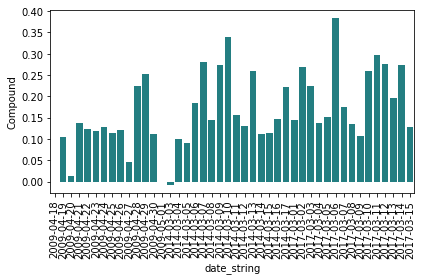

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('kennybritt.png')
plt.show()